In [1]:
import torch
import wandb

import sys
sys.path.append('../src')
from config import config_6
from clip_utils import CLIPModel
from PIL import Image
from train_eval_utils import find_matches, get_captions, get_image_embeddings

In [2]:
entity = 'image-captioning-clip'
project_name = 'image-captioning-CLIP'
exp_name = 'exp_6'
config = config_6
device = config['device']

In [3]:
run = wandb.init()
artifact = run.use_artifact(f'{entity}/{project_name}/{exp_name}:latest',
                            type='model')
artifact_dir = artifact.download()
run.finish()

model = CLIPModel(config)
model.load_state_dict(torch.load(f'{artifact_dir}/{exp_name}.pt'))
model.to(device)

wandb: Currently logged in as: ld2425. Use `wandb login --relogin` to force relogin


wandb: Downloading large artifact exp_6:latest, 346.42MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:0.7


Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_projector.bias', 'vocab_layer_norm.bias', 'vocab_transform.bias', 'vocab_transform.weight', 'vocab_layer_norm.weight', 'vocab_projector.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


CLIPModel(
  (image_encoder): ImageEncoder(
    (model): ResNet(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (act1): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (act1): ReLU(inplace=True)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (drop_block): Identity()
          (act2): ReLU(inplace=True)
          (aa): Identity()
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1

In [4]:
image_path = '../input/raw/flickr30k/Images/6155176.jpg'
n = 5

captions = get_captions(model, config, config['clean_file_path'], image_path, n)

  0%|          | 0/158914 [00:00<?, ?it/s]

A young person with red-hair and a green shirt peers into his telescope .
A little toddler trying to look through a scope but ca n't reach it .
A child looking through a telescope on a playground .
A boy has climbed to the top of a slide .
A man in a blue shirt is holding a young boy and looking through a telescope .


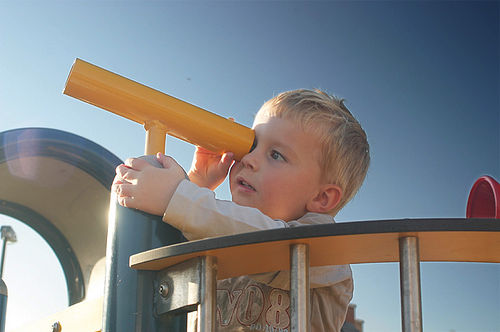

In [5]:
img = Image.open(image_path)

for caption in captions:
    print(caption)

img

In [6]:
df, image_embeddings = get_image_embeddings(model, config)

  0%|          | 0/4967 [00:00<?, ?it/s]

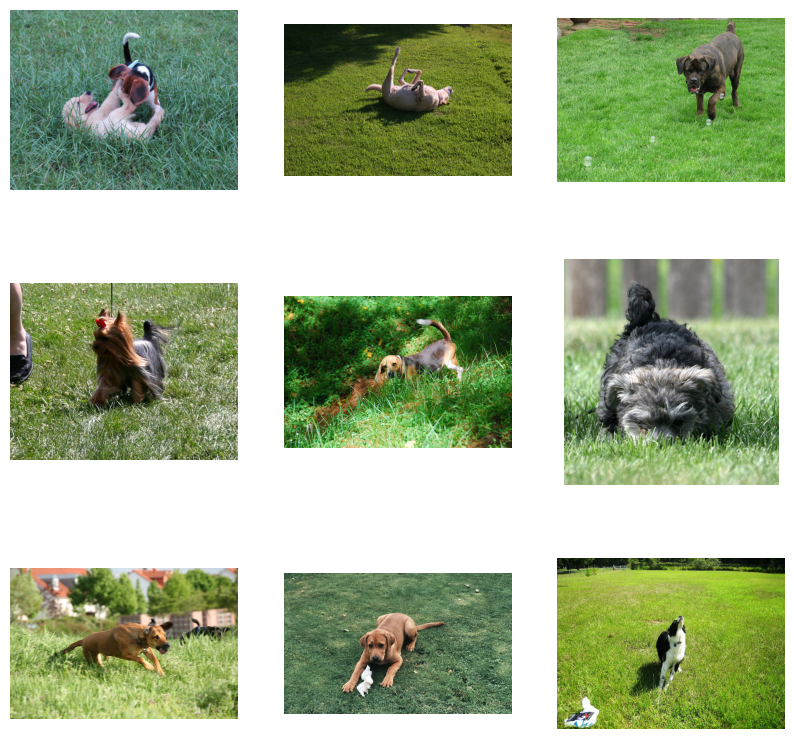

In [7]:
query = "one dog sitting in grass"

find_matches(model, df, image_embeddings, config, query)